# Lecture 3

## Exercise 3.1

In Black-Scholes theory, assets prices $S(t)$ evolve according to a geometric Brownian Motion (GBM), with costant risk-free interest rate $r$ and volatility $\sigma$, i.e. $S(t) \backsim GBM(r,\sigma^2)$. The theory gives also a differential equation, for wich there is an analytic solution for European options:
- Call:
$$C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2)$$
- Put:
$$C\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2}\right) (T-t) \right]$$
$$$$
$$d_2 = d_1 - \sigma\sqrt{T-t}$$
$$$$
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$

Using:
- asset price $S(t=0)=100$;
- delivery time $T=1$;
- strike price $K=100$;
- interest rate $r=0,1$;
- volatility $\sigma=0,25$

we get:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + math.erf(x / np.sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * np.sqrt(T)
    C = S0 * N(d1) - K * np.exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * np.exp(-r * T) * (N(d2)-1.)
    return C, P

##if __name__ == "__main__":
call, put = black_scholes(S0, K, T, r, sigma)
print(" == BLACK-SCHOLES ==")
print("call: ", call)
print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


Another way to calculate the prices is to simulate the GBM:
$$S(T)=S(0)\exp \left[\left(\mu-\dfrac{\sigma^2}{2}\right)T +\sigma W(T)\right]$$
where $W(t)\backsim N(0,t)$. With $10^4$ steps divided into 100 block, we get the following two plots:

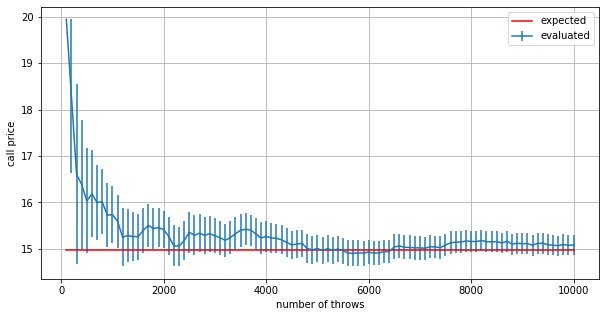

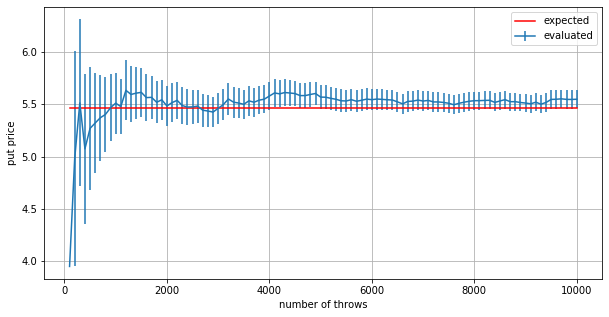

In [2]:
x,y,error=np.loadtxt("es3.1/Callfinal.txt", usecols=(0,1,2), delimiter=" ", unpack='true')
plt.figure(0,figsize=(10,5))
expected=np.zeros(len(x))
expected.fill(call)
plt.plot(x*100,expected,color='red',label='expected')
plt.errorbar(x*100,y,yerr=error,label='evaluated')
plt.xlabel('number of throws')
plt.ylabel(r'call price')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

x,y,error=np.loadtxt("es3.1/Putfinal.txt", usecols=(0,1,2), delimiter=" ", unpack='true')
plt.figure(0,figsize=(10,5))
expected=np.zeros(len(x))
expected.fill(put)
plt.plot(x*100,expected,color='red',label='expected')
plt.errorbar(x*100,y,yerr=error,label='evaluated')
plt.xlabel('number of throws')
plt.ylabel(r'put price')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Since $W(t)\backsim N(0,t)$, we can also simulate prices evolution (another GBM) by sampling their value at discrete times: if $0=t_0<t_1<...<t_{n-1}=T$, we have
$$S(t_{i+1})=S(t_i) \exp\left[\left(\mu-\dfrac{\sigma^2}{2}\right) (t_{i+1}-t_i) +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
where $Z_i\backsim N(0,1)$. Again, we make 100 blocks, each one of 100 steps, obtaining the following plots:

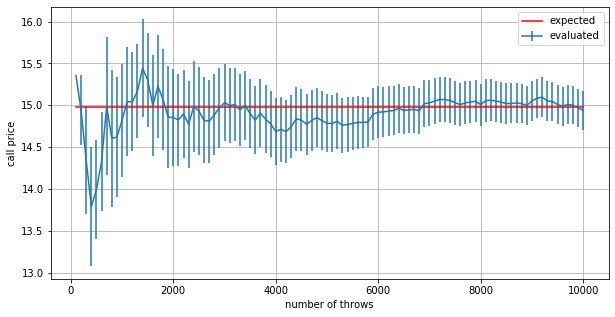

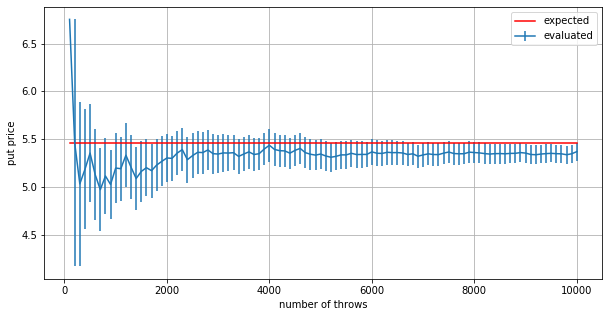

In [3]:
x,y,error=np.loadtxt("es3.1/Calldiscrete.txt", usecols=(0,1,2), delimiter=" ", unpack='true')
plt.figure(0,figsize=(10,5))
expected=np.zeros(len(x))
expected.fill(call)
plt.plot(x*100,expected,color='red',label='expected')
plt.errorbar(x*100,y,yerr=error,label='evaluated')
plt.xlabel('number of throws')
plt.ylabel(r'call price')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

x,y,error=np.loadtxt("es3.1/Putdiscrete.txt", usecols=(0,1,2), delimiter=" ", unpack='true')
plt.figure(0,figsize=(10,5))
expected=np.zeros(len(x))
expected.fill(put)
plt.plot(x*100,expected,color='red',label='expected')
plt.errorbar(x*100,y,yerr=error,label='evaluated')
plt.xlabel('number of throws')
plt.ylabel(r'put price')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Both the methods produce the same results, so it's better to calculate directly the final price, without simulate its evolution, since this approach is less computationally intensive.